# *atommovr* tutorial: figure generation

this notebook contains code to reproduce the data presented in the paper, and to generate the figures from this data or the data displayed in the paper.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter

import atommover.utils as movr
import atommover.algorithms as algos
from atommover.utils.customize import _quantumgray, _quantumviolet, _nikhilgreen, _nikhilblue, _nikhilorange

## Figure 2

#### Loading data from the paper

In [11]:
# for Fig 2a
with open('data/fig2a_250123.pkl', 'rb') as file: 
    results_fig2a = pickle.load(file)

start_ind = 1
s_10 = results_fig2a['success rate'].to_numpy()[0,0,start_ind:,0,0,0]
s_100 = results_fig2a['success rate'].to_numpy()[0,0,start_ind:,1,0,0]
s_1000 = results_fig2a['success rate'].to_numpy()[0,0,start_ind:,2,0,0]
s_10000 = results_fig2a['success rate'].to_numpy()[0,0,start_ind:,3,0,0]

n_atoms = results_fig2a['n targets'].to_numpy()[0,0,:,0,0,0]
target_sizes = []
for i in range(start_ind, len(n_atoms)):
    target_size = n_atoms[i][0]
    target_sizes.append(target_size)

# for Fig 2b

with open('data/fig2b_250127.pkl', 'rb') as file: 
    results_fig2b = pickle.load(file)

r1 = results_fig2b['filling fraction'].to_numpy()[0,0,0,0,0,0]
r2 = results_fig2b['filling fraction'].to_numpy()[0,0,0,0,0,1]
r3 = results_fig2b['filling fraction'].to_numpy()[0,0,0,0,0,2]
s = results_fig2b['success rate'].to_numpy()[0,0,0,0,0,:]

#### Rerunning Fig. 2a

In [ ]:
# loading the parameters from the paper
bench_2a = movr.Benchmarking()

with open('data/fig2a_250123.pkl', 'rb') as file: 
    results_fig2a = pickle.load(file)

bench_2a.load_params_from_dataset(results_fig2a)

# setting any custom parameters 
bench_2a.n_shots = 1 # overwriting this for faster runtime

# running sweep
bench_2a.run()

In [ ]:
# extracting success rate results for each atom lifetime value
start_ind = 1
s_10 = bench_2a.benchmarking_results['success rate'].to_numpy()[0,0,start_ind:,0,0,0]
s_100 = bench_2a.benchmarking_results['success rate'].to_numpy()[0,0,start_ind:,1,0,0]
s_1000 = bench_2a.benchmarking_results['success rate'].to_numpy()[0,0,start_ind:,2,0,0]
s_10000 = bench_2a.benchmarking_results['success rate'].to_numpy()[0,0,start_ind:,3,0,0]

n_atoms = bench_2a.benchmarking_results['n targets'].to_numpy()[0,0,:,0,0,0]
target_sizes = []
for i in range(start_ind, len(n_atoms)):
    target_size = n_atoms[i][0]
    target_sizes.append(target_size)

#### Rerunning Fig. 2b

In [ ]:
# loading the parameters from the paper
bench_2b = movr.Benchmarking()

with open('data/fig2b_250127.pkl', 'rb') as file: 
    results_fig2b = pickle.load(file)

bench_2b.load_params_from_dataset(results_fig2b)

# setting any custom parameters 
bench_2b.n_shots = 10 # overwriting this for faster runtime

# running sweep
bench_2b.run()

In [ ]:
# extracting filling fraction results for different number of rearrangement rounds
r1 = bench_2b.benchmarking_results['filling fraction'].to_numpy()[0,0,0,0,0,0]
r2 = bench_2b.benchmarking_results['filling fraction'].to_numpy()[0,0,0,0,0,1]
r3 = bench_2b.benchmarking_results['filling fraction'].to_numpy()[0,0,0,0,0,2]
s = bench_2b.benchmarking_results['success rate'].to_numpy()[0,0,0,0,0,:]

#### Plotting data for Fig. 2a and Fig. 2b (must run 'Loading data from the paper' box or 'Rerunning Fig. 2x' first).

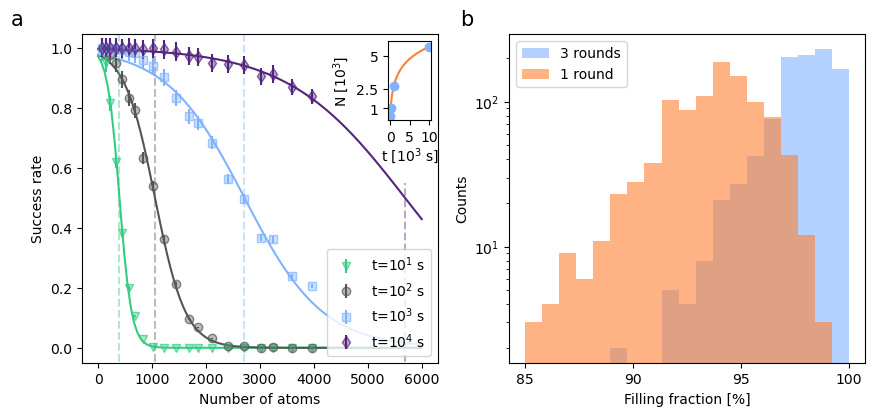

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4.5))

# useful functions
def sigmoid(x,a,b):
    return 1/(1+np.exp(b*(x-a)))
def logfunc(x,a,b,c):
    return c*np.log(a*(x-b))
def pwlaw(x,a,b,c):
    return c*((x-a)**b)

## fig 2a ##
xdata = target_sizes

alpha_marker = 0.4
alpha_border = 0.7
colors = [_nikhilgreen, _quantumgray, _nikhilblue, _quantumviolet]
facecolors = colors

shapemarkers = ["v", "o", "s", "d"]
nummarkers = ['$10^{1}$', '$10^{2}$','$10^{3}$','$10^{4}$' ]
markers = shapemarkers
mark_size = 6

edgecolors = colors
x_axis = np.linspace(1,6000, 100)

labels_full = [r'$t_{\text{lifetime}} = 10~\text{s}$', 
          r'$t_{\text{lifetime}} = 100~\text{s}$', 
          r'$t_{\text{lifetime}} = 1000~\text{s}$', 
          r'$t_{\text{lifetime}} = 10000~\text{s}$']
labels_num = ['10 s', '100 s', '1000 s', '10000 s']
labels_short = [r't=$10^{1}$ s', 
                r't=$10^{2}$ s', 
                r't=$10^{3}$ s', 
                r't=$10^{4}$ s']
labels = labels_short

# curve fits
popt10, pcov10 = curve_fit(sigmoid, xdata, s_10, p0 =[390,0.01])
ax[0].plot(x_axis, sigmoid(x_axis, *popt10), c=colors[0])
perr10 = np.sqrt(np.diag(pcov10))

popt100, pcov100 = curve_fit(sigmoid, xdata, s_100, p0 =[1000,0.003])
ax[0].plot(x_axis, sigmoid(x_axis, *popt100),c=colors[1])
perr100 = np.sqrt(np.diag(pcov100))

popt1000, pcov1000 = curve_fit(sigmoid, xdata, s_1000, p0 =[2000,0.001])
ax[0].plot(x_axis, sigmoid(x_axis, *popt1000), c=colors[2])
perr1000 = np.sqrt(np.diag(pcov1000))

popt10000, pcov10000 = curve_fit(sigmoid, xdata, s_10000, p0 =[3900,0.001])
ax[0].plot(x_axis, sigmoid(x_axis, *popt10000),c=colors[3])
perr10000 = np.sqrt(np.diag(pcov10000))


ymin, ymax = ax[0].get_ylim() 
#vertical lines
ax[0].vlines([popt10[0], popt100[0],popt1000[0]], colors=colors[:3], ymin = -5, ymax = 5, alpha = alpha_marker, linestyles='dashed')
ax[0].vlines(popt10000[0], colors=colors[3], ymin = -5, ymax = 0.55, alpha = alpha_marker, linestyles='dashed')
ax[0].set_ylim(ymin, ymax)
ax[0].errorbar(target_sizes, s_10,    yerr=1/np.sqrt(1000)*s_10,    c=colors[0],label = labels[0], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[0], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[0], alpha=alpha_border))
ax[0].errorbar(target_sizes, s_100,   yerr=1/np.sqrt(1000)*s_100,   c=colors[1],label = labels[1], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[1], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[1], alpha=alpha_border))
ax[0].errorbar(target_sizes, s_1000,  yerr=1/np.sqrt(1000)*s_1000,  c=colors[2],label = labels[2], fmt = markers[2], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[2], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[2], alpha=alpha_border))
ax[0].errorbar(target_sizes, s_10000, yerr=1/np.sqrt(1000)*s_10000, c=colors[3],label = labels[3], fmt = markers[3], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[3], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[3], alpha=alpha_border))


inset_ax = inset_axes(ax[0], width="12%", height="24%", loc="upper right")  # Width and height as a percentage of main plot

lifetimes = np.array([10,100,1000,10000])
half_probs = [popt10[0], popt100[0],popt1000[0],popt10000[0]]

x_vals = np.linspace(0.005,10, 100)

popt, pcov = curve_fit(logfunc, lifetimes, half_probs, p0 =[0.01, 0, 1500], maxfev = 1000)

inset_ax.errorbar(lifetimes/1e3, 
             half_probs, 
             yerr = [perr10[0],perr100[0],perr1000[0],perr10000[0]],
             fmt = 'o', color=_nikhilblue)

inset_ax.plot(x_vals, logfunc(x_vals*1e3, *popt), color=_nikhilorange)
inset_fontsize = 10
inset_ax.set_ylabel('N [$10^{3}$]', fontsize = inset_fontsize)
inset_ax.set_xlabel(r't [$10^{3}$ s]',fontsize = inset_fontsize, labelpad = 1)
inset_ax.set_yticks([1000,2500,5000])
inset_ax.set_yticklabels([1,2.5,5],fontsize = inset_fontsize)
inset_ax.set_xticks([0,5,10])
inset_ax.set_xticklabels([0,5,10],fontsize = inset_fontsize)

ax[0].legend(loc = 'lower right', prop={'size': 10})
ax[0].set_ylabel("Success rate")
ax[0].set_xlabel("Number of atoms")

## Fig 2b ##

bins = np.linspace(85, 100, 20)
data = np.zeros([len(r3), 2])
data[:,0] = 100*np.array(r3)
data[:,1] = 100*np.array(r1)
labels = ['3 rounds','1 round']
linestyles = ['-','--']
edgecolors = ["white", "gray"]
fillcolors = [_nikhilblue, _nikhilorange]
ab_size = 15 # size of a and b labels in combined figure

ax[1].hist(100*np.array(r3), bins=bins,label=f'3 rounds', alpha = 0.6, color = fillcolors[0])
ax[1].hist(100*np.array(r1), bins=bins,label=f'1 round', alpha = 0.6, color = fillcolors[1])
ax[1].set_xlabel("Filling fraction [%]")
ax[1].set_ylabel("Counts")
ax[1].set_yscale('log')
ax[1].set_xticks([85,90,95,100])
ax[1].set_xticklabels([85,90,95,100])
ax[1].legend(prop={'size': 10})

plt.gcf().text(0.02, 0.9, r'$\text{a}$', fontsize=ab_size)
plt.gcf().text(0.52, 0.9, r'$\text{b}$', fontsize=ab_size)
plt.subplots_adjust(bottom=0.15, right = 0.97, left = 0.1)
plt.show()

## Figure 3

#### Loading data from the paper

In [2]:
# getting data

with open('data/scaling_250203.pkl', 'rb') as file: 
    results = pickle.load(file)

with open('data/scaling_zstareucl_250204.pkl', 'rb') as file: 
    euclidean_array = pickle.load(file)

with open('data/scaling_zstargrid_250204.pkl', 'rb') as file: 
    grid_array = pickle.load(file)

with open('data/scaling_parallel_250206.pkl', 'rb') as file: 
    parresults = pickle.load(file)

with open('data/scaling_bcnew_250605.pkl', 'rb') as file: 
    bcnew_res = pickle.load(file)

hun = results['time'].to_numpy()[0,0,:,0,0,0]*1e3 # converting from s to ms
bc = bcnew_res['time'].to_numpy()[0,0,:,0,0,0]*1e3 # ms
parhun = parresults['time'].to_numpy()[0,0,:,0,0,0]*1e3 # ms
parLBAP = parresults['time'].to_numpy()[1,0,:,0,0,0]*1e3 # ms
hun2 = parresults['time'].to_numpy()[2,0,:,0,0,0]*1e3 # ms

targets = results['n targets'].to_numpy()[0,0,:,0,0,0]
n_atoms = []
for tnum in targets:
    n_atoms.append(tnum[0])

params = movr.PhysicalParams()
l6_eucl = np.mean(euclidean_array[2,:,:], axis=1)*(params.spacing/(params.AOD_speed))*1e3 # ms
l6_grid = np.mean(grid_array[2,:,:], axis=1)*(params.spacing/(params.AOD_speed))*1e3 # ms
l6_eucl_std = np.std(euclidean_array[2,:,:], axis=1)*(params.spacing/(params.AOD_speed))*1e3 # ms
l6_grid_std = np.std(grid_array[2,:,:], axis=1)*(params.spacing/(params.AOD_speed))*1e3 # ms

#### Rerunning Fig. 3

In [ ]:
# loading the parameters from the paper
bench_3 = movr.Benchmarking()

with open('data/scaling_250203.pkl', 'rb') as file: 
    results_fig3 = pickle.load(file)

bench_3.load_params_from_dataset(results_fig3)
bench_3.algos = [algos.Hungarian(), algos.ParallelHungarian(), algos.BCv2()]

# setting any custom parameters 
bench_3.n_shots = 2 # overwriting this for faster runtime

# running sweep
bench_3.run()

print('done w this shiet')

from atommover.algorithms.source.scaling_lower_bound import calculate_LB, calculate_Zstar, calculate_Zstar_better

load_probs = [0.5]
params = bench_3.phys_params_list[0] # NB: this code assumes there is only a single error model
error_model = bench_3.error_models_list[0] # NB: this code assumes there is only a single error model
n_shots = bench_3.n_shots
sizes = bench_3.system_size_range
n_species_list = [bench_3.tweezer_array.n_species]

euclidean_array = np.zeros([len(load_probs),len(sizes), n_shots])
grid_array = np.zeros([len(load_probs),len(sizes), n_shots])
max_size = max(sizes)
for ni, n_species in enumerate(n_species_list):
    for si, size in enumerate(sizes):
        for li, load_prob in enumerate(load_probs):
            middle_size = [size, size]
            n = int(np.ceil(np.sqrt((size**2)/load_prob)))
            array = movr.AtomArray(shape=[n,n], params=params, error_model=error_model, n_species = n_species)
            if n_species == 1:
                array.generate_target(movr.Configurations.MIDDLE_FILL, middle_size = middle_size)
            elif n_species == 2:
                array.generate_target(movr.Configurations.ZEBRA_HORIZONTAL, middle_size = middle_size)
            array.params.loading_prob = load_prob
            for i in range(n_shots):
                n_atoms_sufficient = False
                count = 0
                while not n_atoms_sufficient and count < 1000:
                    array.load_tweezers()
                    if n_species == 2:
                        if np.sum(array.matrix[:,:,0]) >= np.sum(array.target[:,:,0]) and np.sum(array.matrix[:,:,1]) >= np.sum(array.target[:,:,1]):
                            n_atoms_sufficient = True
                    elif n_species == 1:
                        if np.sum(array.matrix[:,:,0]) >= np.sum(array.target[:,:,0]):
                            n_atoms_sufficient = True
                    count += 1

                new_dist = calculate_Zstar_better(array.matrix, array.target, metric = 'euclidean', n_species = n_species)
                euclidean_array[li,si,ni,i] = new_dist
                grid_dist = calculate_Zstar_better(array.matrix, array.target, metric = 'moves', n_species = n_species)
                grid_array[li,si,ni,i] = grid_dist

done w this shiet


In [11]:
# extracting rearrangement times for each algorithm
hun = bench_3.benchmarking_results['time'].to_numpy()[0,0,:,0,0,0]*1e3 # converting from s to ms
parhun = bench_3.benchmarking_results['time'].to_numpy()[1,0,:,0,0,0]*1e3 # ms
bc = bench_3.benchmarking_results['time'].to_numpy()[2,0,:,0,0,0]*1e3 # ms

l6_eucl = np.mean(euclidean_array[0,:,0,:], axis=1)*(params.spacing/(params.AOD_speed))*1e3 # ms
l6_grid = np.mean(grid_array[0,:,0,:], axis=1)*(params.spacing/(params.AOD_speed))*1e3 # ms
l6_eucl_std = np.std(euclidean_array[0,:,0,:], axis=1)*(params.spacing/(params.AOD_speed))*1e3 # ms
l6_grid_std = np.std(grid_array[0,:,0,:], axis=1)*(params.spacing/(params.AOD_speed))*1e3 # ms

targets = bench_3.benchmarking_results['n targets'].to_numpy()[0,0,:,0,0,0]
n_atoms = []
for tnum in targets:
    n_atoms.append(tnum[0])
n_atoms = np.array(n_atoms)

In [12]:
print(l6_eucl, l6_eucl_std)

[0.15405694 0.18106602 0.20307764 0.3017767  0.38890873 0.37553381] [0.00405694 0.03106602 0.00307764 0.0517767  0.03535534 0.01497868]


#### Plotting data for Fig. 3 (must run one of the 'Loading data from the paper' or 'Rerunning Fig. 3' boxes first).

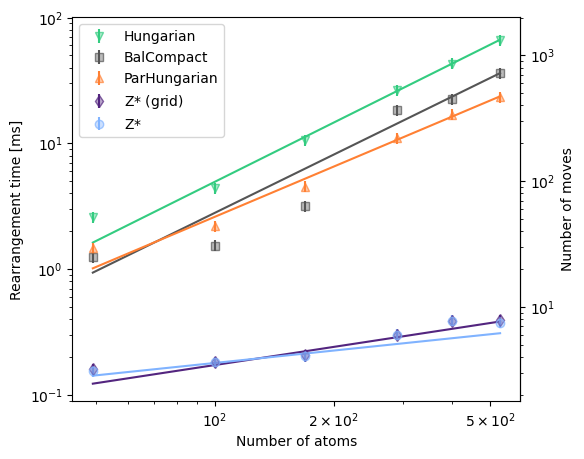

In [13]:
fig, ax = plt.subplots(1,1)

# plot params
alpha_marker = 0.4
alpha_border = 0.7
colors = [_nikhilgreen, _quantumgray, _nikhilblue, _quantumviolet, _nikhilorange, [0.4, 0.2, 0.7]]
facecolors = colors

shapemarkers = ["v", "s", "o", "d", '^', "P"]
markers = shapemarkers
mark_size = 6

edgecolors = colors
x_axis = np.linspace(np.min(n_atoms), np.max(n_atoms), 100)

labels_full = ['Hungarian', 
               'BalCompact', 
               r'Z$*$', 
               r'Z$*$ (grid)', 
               'ParHungarian', 
               'ParLBAP']
labels = labels_full

def pwlaw(x,b,c):
    return c*((x)**b)

# removing nans in case some exist
mask_parhun = ~np.isnan(parhun)
mask_hun = ~np.isnan(hun)
mask_bc = ~np.isnan(bc)

poptparh, pcovparh = curve_fit(pwlaw, n_atoms[mask_parhun], parhun[mask_parhun], p0 =[1.1, 0.01], maxfev = 100000)
perrparh = np.sqrt(np.diag(pcovparh))
poptbc, pcovbc = curve_fit(pwlaw, n_atoms[mask_bc], bc[mask_bc], p0 =[1,0.01], maxfev = 100000)
perrbc = np.sqrt(np.diag(pcovbc))
popthun, pcovhun = curve_fit(pwlaw, n_atoms[mask_hun], hun[mask_hun], p0 =[1.6,0.1], maxfev = 100000)
perrhun = np.sqrt(np.diag(pcovhun))

popt_euc, pcov_euc = curve_fit(pwlaw, n_atoms, l6_eucl, sigma = l6_eucl_std,absolute_sigma=True,p0 =[1,0.01], maxfev = 100000)
perr_euc = np.sqrt(np.diag(pcov_euc))
popt_gr, pcov_gr = curve_fit(pwlaw, n_atoms, l6_grid, sigma=l6_grid_std, absolute_sigma=True, p0 =[1.6,0.1], maxfev = 100000)
perr_gr = np.sqrt(np.diag(pcov_gr))
ax.plot(x_axis, pwlaw(x_axis, *popthun),c=colors[0])
ax.plot(x_axis, pwlaw(x_axis, *poptbc),c=colors[1])
ax.plot(x_axis, pwlaw(x_axis, *popt_gr),c=colors[3])
ax.plot(x_axis, pwlaw(x_axis, *popt_euc),c=colors[2])
ax.plot(x_axis, pwlaw(x_axis, *poptparh),c=colors[4])

ax.errorbar(n_atoms, hun,     yerr=1/np.sqrt(100)*hun,     c=colors[0],label = labels[0], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[0], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[0], alpha=alpha_border))
ax.errorbar(n_atoms, bc,      yerr=1/np.sqrt(100)*bc,      c=colors[1],label = labels[1], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[1], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[1], alpha=alpha_border))
ax.errorbar(n_atoms, parhun,  yerr=1/np.sqrt(100)*parhun,  c=colors[4],label = labels[4], fmt = markers[4], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[4], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[4], alpha=alpha_border))
ax.errorbar(n_atoms, l6_grid, yerr=1/np.sqrt(100)*l6_grid, c=colors[3],label = labels[3], fmt = markers[3], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[3], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[3], alpha=alpha_border))
ax.errorbar(n_atoms, l6_eucl, yerr=1/np.sqrt(100)*l6_eucl, c=colors[2],label = labels[2], fmt = markers[2], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[2], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[2], alpha=alpha_border))

text_size = 10
ax.legend(prop={'size': text_size})
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([100, 200, 500])
ax.set_xticklabels([r'$10^{2}$', r'$2\times 10^{2}$', r'$5\times 10^{2}$'],fontsize = text_size)
ax.set_ylabel('Rearrangement time [ms]')
ax.set_xlabel('Number of atoms')

def deg2rad(x):
    return x / ((params.spacing/(params.AOD_speed))*1e3)

def rad2deg(x):
    return x*(params.spacing/(params.AOD_speed))*1e3

secax = ax.secondary_yaxis('right', functions=(deg2rad, rad2deg))
secax.set_ylabel('Number of moves')
plt.subplots_adjust(bottom=0.15, right = 0.85, left = 0.15, top = 0.95)

## Figure 4

#### Loading data from the paper

In [2]:
with open('data/comparison_fig_250527.pkl', 'rb') as file: 
    results_fig4 = pickle.load(file)

tweezer_errors = np.logspace(-4, -2.5, 30)[::-1]
vac_lifetimes = np.logspace(-1.2, 1, 30)
X, Y = np.meshgrid(np.array(tweezer_errors)*100, np.array(vac_lifetimes))

rates = results_fig4['success rate'].to_numpy()[1,0,0,:,0,0]
rates_arr = results_fig4['success rate'].to_numpy()[:,0,0,:,0,0]

#### Rerunning Fig. 4

In [ ]:
# manually sweeping over error model parameters (note that this must be manual because each error model has different parameter sets)
tweezer_errors = np.logspace(-4, -2.5, 30)[::-1]
vac_lifetimes = np.logspace(-1.2, 1, 30)
err_models = []
for tw_err in tweezer_errors:
    for vac_l in vac_lifetimes:
        errmol = movr.UniformVacuumTweezerError(putdown_fail_rate=tw_err, lifetime=vac_l, pickup_fail_rate=0)
        err_models.append(errmol)

algorithms = [algos.Hungarian(),algos.BCv2()]
sizes = [14]
n_shots = 10
target_configs = [movr.Configurations.MIDDLE_FILL]
bench = movr.Benchmarking(algorithms,
                     sys_sizes=sizes,
                     target_configs=target_configs,
                     error_models_list = err_models,
                     n_shots=n_shots,
                     n_species = 1)
bench.run()

In [4]:
# extracting success rates
X, Y = np.meshgrid(np.array(tweezer_errors)*100, np.array(vac_lifetimes))
rates = bench.benchmarking_results['success rate'].to_numpy()[1,0,0,:,0,0]
rates_arr = bench.benchmarking_results['success rate'].to_numpy()[:,0,0,:,0,0]

#### Plotting data for Fig. 4 (must run one of the 'Loading data from the paper' or 'Rerunning Fig. 4' boxes first).

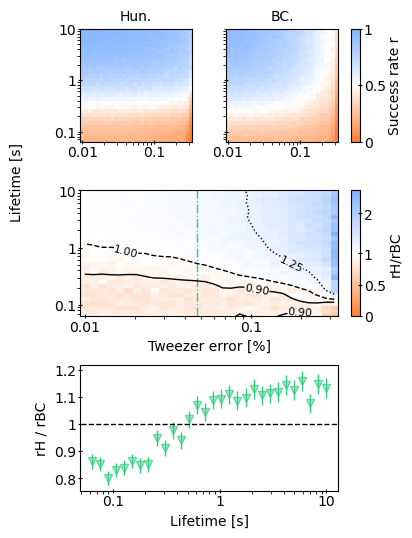

In [3]:
fig = plt.figure(figsize=(5,7))

outer_gs = gridspec.GridSpec(nrows=3, ncols=2, figure=fig, width_ratios=[30, 1], height_ratios=[0.9, 1, 1], hspace=0.4, wspace=0.1)

# First row: nested GridSpec for two plots
inner_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_gs[0, 0], wspace=0.3)

ax1 = fig.add_subplot(inner_gs[0, 0])
ax2 = fig.add_subplot(inner_gs[0, 1])
cax2 = fig.add_subplot(outer_gs[0, 1])  # Colorbar axis
# Second row: single plot
ax3 = fig.add_subplot(outer_gs[1, 0])
cax3 = fig.add_subplot(outer_gs[1, 1])

# Third row: single plot
ax4 = fig.add_subplot(outer_gs[2, 0])

text_size = 10

cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [_nikhilorange, 'white', _nikhilblue])
linecut_col = _nikhilgreen
tickpad = 1

for i in range(3):
    try:
        rates = rates_arr[i,:]
    except IndexError:
        rates = np.zeros_like(rates_arr[0,:]).reshape(len(vac_lifetimes), len(tweezer_errors))
        for mi in range(len(rates)):
            for mj in range(len(rates[0])):
                options = rates_arr[:,mi*len(tweezer_errors)+mj]
                rates[mi,mj] = options[0]/options[1]
    Z = rates.reshape(len(tweezer_errors),len(vac_lifetimes)).T
    if i == 2:
        vcenter = 1
        vmax = Z.max()
        Z_smooth = gaussian_filter(Z, sigma=1)
    else:
        vcenter = 0.5
        vmax = 1

    norm = mcolors.TwoSlopeNorm(vmin=0, vcenter=vcenter, vmax=vmax)
    
    if i == 2:
        im = ax3.pcolor(X,Y, Z, cmap=cmap, norm=norm)
        ax3.set_yscale('log')
        ax3.set_xscale('log')
        ax3.set_ylim([np.min(vac_lifetimes), np.max(vac_lifetimes)])
        # Normalize so that 1 is at the center
        cbar = fig.colorbar(im, cax=cax3, cmap=cmap, norm=norm)
        ax3.axvline(tweezer_errors[16]*100, linestyle = 'dashdot', color = linecut_col, linewidth = 1)
        # ax3.set_title('Ratio', fontsize=text_size)
        ax3.set_xticks([1e-2, 1e-1])
        ax3.set_xticklabels([r'0.01', r'0.1'],fontsize = text_size)
        ax3.set_yticks([10,1,0.1])
        ax3.set_yticklabels([r'10',r'1', r'0.1'],fontsize = text_size)
        ax3.tick_params(direction = 'inout', pad=tickpad, axis='both')
        cbar.ax.set_ylabel('rH/rBC', fontsize=text_size, labelpad = 1.25)
        cbar.ax.tick_params(labelsize=text_size, direction = 'inout', axis='both', pad=tickpad)
        cbar.ax.set_yticks([2,1,0.5,0])
        cbar.ax.set_yticklabels([r'2',r'1',r'0.5', r'0'])
        con = ax3.contour(X,Y,Z_smooth, levels = [0.9, 1, 1.25], colors = 'k', linewidths = 1, linestyles = ['-', '--', ':'])
        ax3.clabel(con, fontsize=text_size-2)
        ax3.set_xlabel("Tweezer error [%]", fontsize=text_size)
    elif i==0:
        im = ax1.pcolor(X,Y, Z, cmap=cmap, norm=norm)
        ax1.set_yscale('log')
        ax1.set_xscale('log')
        ax1.set_ylim([np.min(vac_lifetimes), np.max(vac_lifetimes)])
        ax1.set_ylabel("Lifetime [s]", fontsize=text_size)
        ax1.yaxis.set_label_coords(-0.5, -0.35, transform=None)
        ax1.set_title('Hun.', fontsize=text_size)
        ax1.set_xticks([1e-2, 1e-1])
        ax1.set_xticklabels([r'0.01', r'0.1'],fontsize = text_size)
        ax1.set_yticks([10,1,0.1])
        ax1.set_yticklabels([r'10',r'1', r'0.1'],fontsize = text_size)
        ax1.tick_params(direction = 'inout', axis='both', which='major', pad=tickpad)
    elif i==1:
        im = ax2.pcolor(X,Y, Z, cmap=cmap, norm=norm)
        ax2.set_yscale('log')
        ax2.set_xscale('log')
        ax2.set_ylim([np.min(vac_lifetimes), np.max(vac_lifetimes)])
        ax2.set_title('BC.', fontsize=text_size)
        ax2.set_xticks([1e-2, 1e-1])
        ax2.set_xticklabels([r'0.01', r'0.1'],fontsize = text_size)
        ax2.set_yticklabels([])
        cbar = fig.colorbar(im, cax=cax2)
        cbar.ax.tick_params(labelsize=text_size, direction = 'inout', pad=tickpad)
        cbar.ax.set_yticks([1,0.5,0])
        cbar.ax.set_yticklabels([r'1',r'0.5', r'0'])
        cbar.ax.set_ylabel(r'Success rate r', fontsize=text_size, labelpad = 1.5)
        ax2.tick_params(direction = 'inout', axis='both', pad=tickpad)

pointcolor = linecut_col
markersize = 6
ax4.errorbar(np.array(vac_lifetimes), rates[16,:], yerr=1/np.sqrt(1000)*rates[16,:], c=pointcolor,fmt = "v", markersize = markersize, markerfacecolor=mpl.colors.to_rgba(pointcolor, alpha=0.4), markeredgecolor=mpl.colors.to_rgba(pointcolor, alpha=0.7), elinewidth=1)
ax4.set_xscale('log')
ax4.hlines(1, xmin = min(vac_lifetimes)*0.8, xmax = max(vac_lifetimes)*1.25, color = 'k', ls = '--', linewidth = 1)
ax4.set_xlabel('Lifetime [s]', fontsize = text_size)
ax4.set_xticks([0.1, 1, 10])
ax4.set_xticklabels(['0.1', '1', '10'],fontsize = text_size)
ax4.set_yticks([0.8, 0.9, 1, 1.1, 1.2])
ax4.set_yticklabels(['0.8','0.9', '1', '1.1','1.2'],fontsize = text_size)
ax4.set_ylabel('rH / rBC', fontsize = text_size)
ax4.tick_params(labelsize=text_size, pad=tickpad, direction='inout')

plt.subplots_adjust(bottom=0.17, right = 0.78, left = 0.22, top = 0.83)

## Figure 5

#### Loading data from the paper

In [11]:
df_c = pd.read_csv("data/Fig_4c_data_final.csv")
df_d_inout=pd.read_csv("data/Fig_4d_inside_out_Final.csv").iloc[:-1]
df_d_parh = pd.read_csv("data/Fig_4d_naive_par_Final.csv").iloc[:-1]
df_e_inout=pd.read_csv("data/Fig_4e_inside_out_Final.csv").iloc[:-1].iloc[12:]
df_e_parh = pd.read_csv("data/Fig_4e_naive_par_Final.csv").iloc[:-1].iloc[12:]

In [15]:
np.sqrt(df_d_parh['Success_separate'].iloc[12:]*1000)

12     8.831761
13    15.000000
14    18.601075
15    21.307276
16    22.181073
17    21.863211
18    21.702534
19    21.470911
20    22.000000
21    21.166010
22    21.236761
23    21.189620
24    20.688161
25    20.396078
26    19.313208
27    20.074860
28    20.074860
29    19.364917
30    18.947295
31    18.330303
32    17.888544
33    17.776389
34    18.734994
35    16.703293
36    17.233688
37    15.905974
38    15.874508
39    14.866069
40    14.177447
41    14.560220
42    12.489996
43    12.083046
44    11.269428
45     9.949874
46     8.544004
47     5.000000
48     4.358899
49     2.449490
Name: Success_separate, dtype: float64

#### Rerunning Fig. 5

In [6]:
# (pending since I don't have the code to run this)

#### Plotting data for Fig. 5 (must run one of the 'Loading data from the paper' or 'Rerunning Fig. 5' boxes first).

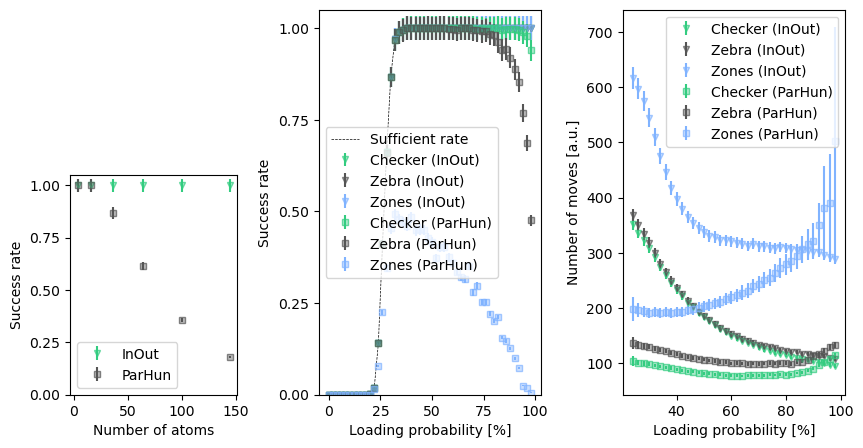

In [13]:
df_c = pd.read_csv("data/Fig_4c_data_final.csv")


alpha_marker = 0.4
alpha_border = 0.7
colors = [_nikhilgreen, _quantumgray, _nikhilblue, _quantumviolet, _nikhilorange, [0.4, 0.2, 0.7]] #['orange', '#555555', 'b', '#008080']
facecolors = colors

shapemarkers = ["v", "s", "o", "d", '^', "P"]
markers = shapemarkers
mark_size = 4
labels_c = ['InOut', 'ParHun']
labels_d = ['Sufficient rate','Checker (InOut)', 'Zebra (InOut)', 'Zones (InOut)', 'Checker (ParHun)', 'Zebra (ParHun)', 'Zones (ParHun)']

edgecolors = colors

fig = plt.figure(figsize = (10,5))

# Outer GridSpec: 1 row × 4 columns
outer_gs = gridspec.GridSpec(1, 3, width_ratios=[0.75, 1, 1], wspace=0.4)

# First column: Nested GridSpec (2 rows in col 0)
left_gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[0], height_ratios=[1, 1.5], hspace=0.1)

# Bottom half of first column: single plot
axC = fig.add_subplot(left_gs[1])

# Columns 2–4: individual plots
axD = fig.add_subplot(outer_gs[1])
axE = fig.add_subplot(outer_gs[2])

n_atoms = []
for leng in df_c['System Size']:
    n_atoms.append(leng**2)

# fig 4c
axC.errorbar(n_atoms, df_c['Success Rate (Inside Out)'], yerr=df_c['Success Rate (Inside Out)']/np.sqrt(1000),c=colors[0],label = labels_c[0], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[0], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[0], alpha=alpha_border))
axC.errorbar(n_atoms, df_c['Success Rate (Naive)'], yerr=df_c['Success Rate (Naive)']/np.sqrt(1000),c=colors[1],label = labels_c[1], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[1], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[1], alpha=alpha_border))
text_size = 10
axC.legend(prop={'size': text_size})
axC.set_ylim(0,1.05)
axC.set_yticks([0,0.25,0.5,0.75,1])
axC.set_ylabel('Success rate', fontsize=text_size)
axC.set_xlabel('Number of atoms', fontsize=text_size)

# fig 4d
load_probs = df_d_inout['LoadingProb']
# sufficient atom rate
axD.plot(load_probs, df_d_inout['Not_enough'], label = labels_d[0], ls='--', c = 'k',linewidth=0.5)
# inside out
axD.errorbar(load_probs, y=df_d_inout['Success_checker'], yerr=df_d_inout['Success_checker']/np.sqrt(1000), c=colors[0],label = labels_d[1], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[0], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[0], alpha=alpha_border))
axD.errorbar(load_probs, y=df_d_inout['Success_zebra'], yerr=df_d_inout['Success_zebra']/np.sqrt(1000), c=colors[1],label = labels_d[2], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[1], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[1], alpha=alpha_border))
axD.errorbar(load_probs, y=df_d_inout['Success_separate'], yerr=df_d_inout['Success_separate']/np.sqrt(1000), c=colors[2],label = labels_d[3], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[2], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[2], alpha=alpha_border))
# par hun
axD.errorbar(load_probs, y= df_d_parh['Success_checker'], yerr=df_d_parh['Success_checker']/np.sqrt(1000), c=colors[0],label = labels_d[4], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[0], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[0], alpha=alpha_border))
axD.errorbar(load_probs, y= df_d_parh['Success_zebra'],   yerr=df_d_parh['Success_zebra']/np.sqrt(1000), c=colors[1],label = labels_d[5], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[1], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[1], alpha=alpha_border))
axD.errorbar(load_probs, y= df_d_parh['Success_separate'],yerr=df_d_parh['Success_separate']/np.sqrt(1000), c=colors[2],label = labels_d[6], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[2], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[2], alpha=alpha_border))
axD.set_ylim(0,1.05)
axD.set_yticks([0,0.25,0.5,0.75,1])
axD.set_ylabel('Success rate', fontsize=text_size)
axD.set_xlabel('Loading probability [%]', fontsize=text_size)
axD.legend(prop={'size': text_size})

# fig 4e
load_probs = df_e_inout['LoadingProb']
# inside out
axE.errorbar(load_probs, y=df_e_inout['MoveSteps_checker'],yerr=df_e_inout['MoveSteps_checker']/np.sqrt(1000), c=colors[0],label = labels_d[1], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[0], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[0], alpha=alpha_border))
axE.errorbar(load_probs, y=df_e_inout['MoveSteps_zebra'],  yerr=df_e_inout['MoveSteps_zebra']/np.sqrt(1000), c=colors[1],label = labels_d[2], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[1], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[1], alpha=alpha_border))
axE.errorbar(load_probs, y=df_e_inout['MoveSteps_separate'], yerr=df_e_inout['MoveSteps_separate']/np.sqrt(1000), c=colors[2],label = labels_d[3], fmt = markers[0], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[2], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[2], alpha=alpha_border))
# par hun
axE.errorbar(load_probs, y= df_e_parh['MoveSteps_checker'], yerr=df_e_parh['MoveSteps_checker']/np.sqrt(df_d_parh['Success_checker'].iloc[12:]*1000), c=colors[0],label = labels_d[4], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[0], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[0], alpha=alpha_border))
axE.errorbar(load_probs, y= df_e_parh['MoveSteps_zebra'],   yerr=df_e_parh['MoveSteps_zebra']/np.sqrt(df_d_parh['Success_zebra'].iloc[12:]*1000), c=colors[1],label = labels_d[5], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[1], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[1], alpha=alpha_border))
axE.errorbar(load_probs, y= df_e_parh['MoveSteps_separate'],yerr=df_e_parh['MoveSteps_separate']/np.sqrt(df_d_parh['Success_separate'].iloc[12:]*1000), c=colors[2],label = labels_d[6], fmt = markers[1], markersize = mark_size, markerfacecolor=mpl.colors.to_rgba(facecolors[2], alpha=alpha_marker), markeredgecolor=mpl.colors.to_rgba(edgecolors[2], alpha=alpha_border))

axE.set_ylabel('Number of moves [a.u.]', fontsize=text_size)
axE.set_xlabel('Loading probability [%]', fontsize=text_size)
axE.legend(prop={'size': text_size})